In [1]:
#libraries
import shutil
from collections import OrderedDict
import json
import numpy as np

#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib


#for colab users only - keep the base directory same as above
import os

In [6]:
base_dir = '/media/volume/sdb/experiment'
os.chdir(base_dir)

In [21]:
#comment after installed once
!git clone https://github.com/MIC-DKFZ/nnUNet.git 
# !git clone https://github.com/prateekgupta891/nnUNet.git #my forked version
!git clone https://github.com/NVIDIA/apex

Cloning into 'nnUNet'...
remote: Enumerating objects: 6048, done.
remote: Total 6048 (delta 0), reused 0 (delta 0), pack-reused 6048
Receiving objects: 100% (6048/6048), 1.50 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (4760/4760), done.
Cloning into 'apex'...
remote: Enumerating objects: 10636, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 10636 (delta 89), reused 79 (delta 36), pack-reused 10478
Receiving objects: 100% (10636/10636), 15.16 MiB | 35.04 MiB/s, done.
Resolving deltas: 100% (7315/7315), done.


In [22]:
respository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(respository_dir)

!pip install -e .
#(optional installation)
!pip install --upgrade git+https://github.com/nanohanno/hiddenlayer.git@bugfix/get_trace_graph#egg=hiddenlayer

os.chdir(base_dir)

Obtaining file:///media/volume/sdb/experiment/nnUNet
  Attempting uninstall: nnunet
    Found existing installation: nnunet 1.7.0
    Uninstalling nnunet-1.7.0:
      Successfully uninstalled nnunet-1.7.0
  Running setup.py develop for nnunet
  Cloning https://github.com/nanohanno/hiddenlayer.git (to revision bugfix/get_trace_graph) to /tmp/pip-install-95y6iw50/hiddenlayer
  Running command git clone -q https://github.com/nanohanno/hiddenlayer.git /tmp/pip-install-95y6iw50/hiddenlayer
  Running command git checkout -b bugfix/get_trace_graph --track origin/bugfix/get_trace_graph
  Switched to a new branch 'bugfix/get_trace_graph'
  Branch 'bugfix/get_trace_graph' set up to track remote branch 'bugfix/get_trace_graph' from 'origin'.
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=19744 sha256=dc8d8ae7c98af1bb320d682294c42467c4aa63313adfa1cb58e67123b4e2c43a
  Stored in directory: /tmp/pip-ephem-wheel-cache-a_kz1vc7/wheels/e9/60/99/e593b68b59ae4d83fb29df66d9

In [13]:
if os.getcwd()==base_dir:
    
    print('We are in the correct directory')
else:
    print("Run set base directory step again, then check to verify.")
    

We are in the correct directory


In [7]:
#libraries
import shutil
from collections import OrderedDict
import json
import numpy as np

#visualization of the dataset
import matplotlib.pyplot as plt
import nibabel as nib


#for colab users only - keep the base directory same as above
import os
repository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(base_dir)

In [4]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f'{folder_path} exists.')
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

In [8]:
task_name = 'Task500_AMOS' #change here for different task name
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

In [6]:
make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/labelsTr exists.
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTs exists.
/media/volume/sdb/experiment/nnUNet/nnunet/nnunet_trained_models exists.


In [9]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base')
os.environ['nnUNet_preprocessed'] = '/home/exouser/preprocessed'
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models')

In [8]:
print(os.getcwd())
print(main_dir)

/media/volume/sdb/experiment
/media/volume/sdb/experiment/nnUNet/nnunet


In [10]:
for label in os.listdir('/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/labelsTr'):
    print(label)
    modality_added = label.split('.')[0] + '_0000.nii.gz'
    print(modality_added)
    
    os.rename('/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/labelsTr/'
              + label, 
             '/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/labelsTr/' 
              + modality_added)

amos_0175.nii.gz
amos_0175_0000.nii.gz
amos_0137.nii.gz
amos_0137_0000.nii.gz
amos_0383.nii.gz
amos_0383_0000.nii.gz
amos_0007.nii.gz
amos_0007_0000.nii.gz
amos_0593.nii.gz
amos_0593_0000.nii.gz
amos_0281.nii.gz
amos_0281_0000.nii.gz
amos_0254.nii.gz
amos_0254_0000.nii.gz
amos_0072.nii.gz
amos_0072_0000.nii.gz
amos_0160.nii.gz
amos_0160_0000.nii.gz
amos_0195.nii.gz
amos_0195_0000.nii.gz
amos_0126.nii.gz
amos_0126_0000.nii.gz
amos_0239.nii.gz
amos_0239_0000.nii.gz
amos_0143.nii.gz
amos_0143_0000.nii.gz
amos_0548.nii.gz
amos_0548_0000.nii.gz
amos_0105.nii.gz
amos_0105_0000.nii.gz
amos_0185.nii.gz
amos_0185_0000.nii.gz
amos_0302.nii.gz
amos_0302_0000.nii.gz
amos_0224.nii.gz
amos_0224_0000.nii.gz
amos_0181.nii.gz
amos_0181_0000.nii.gz
amos_0017.nii.gz
amos_0017_0000.nii.gz
amos_0036.nii.gz
amos_0036_0000.nii.gz
amos_0058.nii.gz
amos_0058_0000.nii.gz
amos_0570.nii.gz
amos_0570_0000.nii.gz
amos_0405.nii.gz
amos_0405_0000.nii.gz
amos_0555.nii.gz
amos_0555_0000.nii.gz
amos_0172.nii.gz
amos_017

In [11]:
for image in os.listdir('/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTr/'):
    print(image)
    modality_added = image.split('.')[0] + '_0000.nii.gz'
    print(modality_added)
    
    os.rename('/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTr//'
              + image, 
             '/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTr//' 
              + modality_added)

amos_0175.nii.gz
amos_0175_0000.nii.gz
amos_0137.nii.gz
amos_0137_0000.nii.gz
amos_0383.nii.gz
amos_0383_0000.nii.gz
amos_0007.nii.gz
amos_0007_0000.nii.gz
amos_0593.nii.gz
amos_0593_0000.nii.gz
amos_0281.nii.gz
amos_0281_0000.nii.gz
amos_0254.nii.gz
amos_0254_0000.nii.gz
amos_0072.nii.gz
amos_0072_0000.nii.gz
amos_0160.nii.gz
amos_0160_0000.nii.gz
amos_0195.nii.gz
amos_0195_0000.nii.gz
amos_0126.nii.gz
amos_0126_0000.nii.gz
amos_0239.nii.gz
amos_0239_0000.nii.gz
amos_0143.nii.gz
amos_0143_0000.nii.gz
amos_0548.nii.gz
amos_0548_0000.nii.gz
amos_0105.nii.gz
amos_0105_0000.nii.gz
amos_0185.nii.gz
amos_0185_0000.nii.gz
amos_0302.nii.gz
amos_0302_0000.nii.gz
amos_0224.nii.gz
amos_0224_0000.nii.gz
amos_0181.nii.gz
amos_0181_0000.nii.gz
amos_0017.nii.gz
amos_0017_0000.nii.gz
amos_0036.nii.gz
amos_0036_0000.nii.gz
amos_0058.nii.gz
amos_0058_0000.nii.gz
amos_0570.nii.gz
amos_0570_0000.nii.gz
amos_0405.nii.gz
amos_0405_0000.nii.gz
amos_0555.nii.gz
amos_0555_0000.nii.gz
amos_0172.nii.gz
amos_017

In [34]:
os.chdir('/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS')

f = open('dataset.json')
data = json.load(f)

CT_image_list = []
CT_label_list = []
for i in data['training']:
    CT_image_list.append(i.get('image')[11:])
    CT_label_list.append(i.get('label')[11:])
    
print(len(CT_label_list))
print(len(CT_image_list))

200
200


In [12]:
CT_test_list = []
for i in data['test']:
    CT_test_list.append(i[11:])
print(len(CT_test_list))

100


In [13]:
all_image_list_modal = os.listdir('imagesTr/')
all_label_list_modal = os.listdir('labelsTr/')
all_test_list_modal = os.listdir('imagesTs/')

all_image_list = []
all_label_list = []
all_test_list = []

for i in all_image_list_modal:
    image = i[:9] + i[14:]
    all_image_list.append(image)
    
for j in all_label_list_modal:
    label = j[:9] + j[14:]
    all_label_list.append(label)
    
for k in all_test_list_modal:
    test = k[:9] + k[14:]
    all_test_list.append(test)
    
    
print(len(all_image_list))
print(len(all_label_list))
print(len(all_test_list))

200
200
100


In [14]:
diff_image_list = list(set(all_image_list) - set(CT_image_list))
diff_label_list = list(set(all_label_list) - set(CT_label_list))
diff_test_list = list(set(all_test_list) - set(CT_test_list))
print(len(diff_test_list))

0


In [15]:
for i in diff_image_list:
    target_removal_name = i[:9] + "_0000.nii.gz"
    print(target_removal_name)
    os.remove('imagesTr/' + target_removal_name)

for j in diff_label_list:
    target_removal_name = j[:9] + "_0000.nii.gz"
    os.remove('labelsTr/' + target_removal_name)
    
for k in diff_test_list:
    target_removal_name = k[:9] + "_0000.nii.gz"
    os.remove('imagesTs/' + target_removal_name)

FileNotFoundError: [Errno 2] No such file or directory: 'labelsTr/amos_0116_0000.nii.gz'

In [126]:
os.chdir('labelsTr/')
for i in os.listdir('../labelsTr/'):
    os.rename(i, i[:9] + ".nii.gz")

FileNotFoundError: [Errno 2] No such file or directory: 'labelsTr/'

In [21]:
print(os.getcwd())
# os.chdir('Task500_AMOS/')
train_files = os.listdir('imagesTr')
label_files = os.listdir('labelsTr')
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))
print("Testing files:",len(os.listdir('imagesTs')))

/media/volume/sdb/experiment


FileNotFoundError: [Errno 2] No such file or directory: 'Task500_AMOS/'

In [36]:
#renaming to add the modality for SCGM there is only one modality 
#images should be added with 0000
#can be skipped if modality is already mentioned
#re-write for multiple modalities
print(os.getcwd())
os.chdir('/media/volume/sdb/experiment/')
def check_modality(filename):
    """
    check for the existence of modality
    return False if modality is not found else True
    """
    end = filename.find('.nii.gz')
    modality = filename[end-4:end]
    for mod in modality: 
        if not(ord(mod)>=48 and ord(mod)<=57): #if not in 0 to 9 digits
            return False
    return True

def rename_for_single_modality(directory):
    
    for file in os.listdir(directory):
        
        if check_modality(file)==False:
            new_name = file[:file.find('.nii.gz')]+"_0000.nii.gz"
            os.rename(os.path.join(directory,file),os.path.join(directory,new_name))
            print(f"Renamed to {new_name}")
        else:
            print(f"Modality present: {file}")

rename_for_single_modality(train_image_dir)
rename_for_single_modality(test_dir)

/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS
Modality present: amos_0111_0000.nii.gz
Modality present: amos_0396_0000.nii.gz
Modality present: amos_0059_0000.nii.gz
Modality present: amos_0180_0000.nii.gz
Modality present: amos_0249_0000.nii.gz
Modality present: amos_0079_0000.nii.gz
Modality present: amos_0044_0000.nii.gz
Modality present: amos_0153_0000.nii.gz
Modality present: amos_0098_0000.nii.gz
Modality present: amos_0016_0000.nii.gz
Modality present: amos_0119_0000.nii.gz
Modality present: amos_0083_0000.nii.gz
Modality present: amos_0387_0000.nii.gz
Modality present: amos_0179_0000.nii.gz
Modality present: amos_0231_0000.nii.gz
Modality present: amos_0383_0000.nii.gz
Modality present: amos_0045_0000.nii.gz
Modality present: amos_0160_0000.nii.gz
Modality present: amos_0124_0000.nii.gz
Modality present: amos_0025_0000.nii.gz
Modality present: amos_0067_0000.nii.gz
Modality present: amos_0066_0000.nii.gz
Modality present: amos_0126

In [37]:
print(os.getcwd())
os.chdir('/media/volume/sdb/experiment/nnUNet')
!python nnunet/experiment_planning/nnUNet_plan_and_preprocess.py -t 500 --verify_dataset_integrity

/media/volume/sdb/experiment


Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case amos_0001
checking case amos_0004
checking case amos_0005
checking case amos_0006
checking case amos_0007
checking case amos_0009
checking case amos_0010
checking case amos_0011
checking case amos_0014
checking case amos_0015
checking case amos_0016
checking case amos_0017
checking case amos_0019
checking case amos_0021
checking case amos_0023
checking case amos_0024
checking case amos_0025
checking case amos_0027
checking case amos_0030
checking case amos_0033
checking case amos_0035
checking case amos_0036
checking case amos_0038
checking case amos_0042
checking c

before crop: (1, 116, 512, 512) after crop: (1, 116, 512, 512) spacing: [5.         0.94599998 0.94599998] 

amos_0064
before crop: (1, 89, 512, 512) after crop: (1, 89, 512, 512) spacing: [5.         0.78200001 0.78200001] 

amos_0030
before crop: (1, 125, 512, 512) after crop: (1, 125, 512, 512) spacing: [5.         0.90700001 0.90700001] 

amos_0016
before crop: (1, 91, 512, 512) after crop: (1, 91, 512, 512) spacing: [5.         0.78200001 0.78200001] 

amos_0044
before crop: (1, 104, 768, 768) after crop: (1, 104, 768, 768) spacing: [5.        0.5078125 0.5078125] 

amos_0092
amos_0066
amos_0006
before crop: (1, 88, 512, 512) after crop: (1, 88, 512, 512) spacing: [5.         0.78200001 0.78200001] 

before crop: (1, 132, 512, 512) after crop: (1, 132, 512, 512) spacing: [5.         0.78200001 0.78200001] 

before crop: (1, 99, 512, 512) after crop: (1, 99, 512, 512) spacing: [5.         0.83499998 0.83499998] 

amos_0050
amos_0077
amos_0017
amos_0033
before crop: (1, 91, 512, 512

before crop: (1, 124, 512, 512) after crop: (1, 124, 512, 512) spacing: [5.         0.78200001 0.78200001] 

amos_0166
before crop: (1, 81, 512, 512) after crop: (1, 81, 512, 512) spacing: [5.         0.78200001 0.78200001] 

amos_0181
amos_0138
before crop: (1, 118, 512, 512) after crop: (1, 118, 512, 512) spacing: [5.    0.866 0.866] 

amos_0153
before crop: (1, 82, 512, 512) after crop: (1, 82, 512, 512) spacing: [5.         0.78100002 0.78100002] 

before crop: (1, 93, 512, 512) after crop: (1, 93, 512, 512) spacing: [5.         0.80800003 0.80800003] 

amos_0192
before crop: (1, 123, 512, 512) after crop: (1, 123, 512, 512) spacing: [5.         0.78200001 0.78200001] 

amos_0212
amos_0230
before crop: (1, 215, 512, 512) after crop: (1, 215, 512, 512) spacing: [2.         0.54492188 0.54492188] 

amos_0173
amos_0141
before crop: (1, 89, 512, 512) after crop: (1, 89, 512, 512) spacing: [5.         0.89999998 0.89999998] 

amos_0154
before crop: (1, 202, 512, 512) after crop: (1, 202

amos_0367
amos_0376
before crop: (1, 91, 768, 768) after crop: (1, 91, 768, 768) spacing: [5.         0.65104169 0.65104169] 

before crop: (1, 81, 768, 768) after crop: (1, 81, 768, 768) spacing: [5.         0.54296875 0.54296875] 

amos_0330
before crop: (1, 92, 512, 512) after crop: (1, 92, 512, 512) spacing: [5.         0.62109375 0.62109375] 

amos_0396
before crop: (1, 86, 768, 768) after crop: (1, 86, 768, 768) spacing: [5.         0.64322919 0.64322919] 

amos_0226
amos_0387
amos_0282
amos_0351
before crop: (1, 105, 768, 768) after crop: (1, 105, 768, 768) spacing: [5.         0.58203125 0.58203125] 

before crop: (1, 303, 512, 512) after crop: (1, 303, 512, 512) spacing: [2.        0.6171875 0.6171875] 

before crop: (1, 265, 512, 512) after crop: (1, 265, 512, 512) spacing: [2.         0.78710938 0.78710938] 

before crop: (1, 341, 512, 512) after crop: (1, 341, 512, 512) spacing: [1.25     0.703125 0.703125] 

amos_0332
before crop: (1, 228, 512, 512) after crop: (1, 228, 51

8 8408
9 7828
10 1147
11 10000
12 10000
13 4799
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0083.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.88800001, 0.88800001]), 'spacing_transposed': array([5.        , 0.88800001, 0.88800001]), 'data.shape (data is transposed)': (1, 124, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 187, 272, 272)} 

1 10000
2 10000
3 3696
4 2910
5 10000
6 10000
7 10000
8 9918
9 8742
10 907
11 4196
12 10000
13 5201
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0036.npz
before: {'spacing': array([5.       , 0.5703125, 0.5703125]), 'spacing_transposed': array([5.       , 0.5703125, 0.5703125]), 'data.shape (data is transposed)': (1, 90, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 135, 262, 262)} 

separate z

1 10000
separate z, order in z is 0 order inplane is 1
2 10000
3 526
4 2845
5 10000
6 10000
7 7935
8 8751
9 10000
10 465
11 6507
12 10000
13 3070
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0049.npz
before: {'spacing': array([5.        , 0.56901044, 0.56901044]), 'spacing_transposed': array([5.        , 0.56901044, 0.56901044]), 'data.shape (data is transposed)': (1, 80, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 120, 262, 262)} 

separate z, order in z is 0 order inplane is 1
1 10000
2 10000
3 4503
4 775
5 10000
6 10000
7 10000
separate z, order in z is 0 order inplane is 1
8 3719
9 3026
10 317
11 8078
12 3782
13 6408
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0005.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.64973956, 0.64973956]), 'spacing_transposed': array([5.        , 0.64973956, 0.649

10 735
11 4576
12 7697
1 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0030.npz
2 10000
3 5445
4 702
5 10000
6 10000
separate z, order in z is 0 order inplane is 1
7 6541
8 9044
9 7089
10 853
11 4951
12 10000
13 1516
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0077.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 91, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 137, 240, 240)} 

1 10000
2 10000
3 3426
4 2039
5 10000
6 10000
7 10000
8 7395
9 6166
10 735
11 5569
12 10000
13 4

9 8179
1 10000
10 692
2 10000
11 4228
4 835
12 10000
5 10000
6 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0035.npz
7 6909
8 4934
9 6360
10 725
11 7038
12 7194
13 2844
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0079.npz
before: {'spacing': array([5.        , 0.65104169, 0.65104169]), 'spacing_transposed': array([5.        , 0.65104169, 0.65104169]), 'data.shape (data is transposed)': (1, 91, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 137, 300, 300)} 

1 10000
2 10000
3 4491
4 876
separate z, order in z is 0 order inplane is 1
5 10000
6 10000
7 10000
8 4558
9 10000
10 641
11 6023
12 7149
separate z, order in z is 0 order inplane is 3
13 5636
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0045.npz
before: {'spacing': array([5.        , 0.89200002, 0.89200002]), 'spacing_transposed': array(

13 2084
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0131.npz
1 10000
2 10000
3 2758
before: {'spacing': array([5.        , 0.60807294, 0.60807294]), 'spacing_transposed': array([5.        , 0.60807294, 0.60807294]), 'data.shape (data is transposed)': (1, 94, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 141, 280, 280)} 

4 1055
5 10000
6 10000
7 7006
1 10000
8 9807
9 7739
2 10000
10 954
3 1701
11 5126
12 7371
4 1319
13 2175
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0098.npz
5 10000
6 10000
7 10000
8 8417
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
9 10000
10 720
11 5307
12 2699
13 4247
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0142.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spa

1 10000
2 10000
3 4366
4 959
5 10000
6 10000
7 9080
8 7515
9 8721
10 810
11 6635
12 10000
13 2659
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0147.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.65104169, 0.65104169]), 'spacing_transposed': array([5.        , 0.65104169, 0.65104169]), 'data.shape (data is transposed)': (1, 97, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 146, 300, 300)} 

before: {'spacing': array([5.   , 0.949, 0.949]), 'spacing_transposed': array([5.   , 0.949, 0.949]), 'data.shape (data is transposed)': (1, 140, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 211, 291, 291)} 

1 7001
2 10000
3 3308
1 10000
4 1186
2 10000
5 10000
6 10000
3 1874
7 10000
4 2984
8 3951
5 10000
9 2055
10 853
6 10000
11 6518
7

13 3239
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0152.npz
1 10000
2 10000
3 215
4 204
5 10000
6 10000
7 4269
8 4315
separate z, order in z is 0 order inplane is 3
9 7760
10 479
11 5423
12 10000
13 2694
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0103.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.

6 10000
1 10000
2 10000
7 10000
3 2292
8 4909
separate z, order in z is 0 order inplane is 1
4 549
9 5100
5 10000
6 10000
10 1101
7 7056
11 4881
8 5698
9 4311
12 4914
10 731
13 1185
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0105.npz
11 3644
12 10000
13 5422
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0138.npz
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 123, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 185, 240, 240)} 

1 5963
2 10000
3 2370
4 3177
5 10000
6 4
7 10000
8 3371
9 2585
10 872
11 2356
12 10000
13 1637
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0192.npz
before: {'spacing': array([5.        , 0.46614584, 0.46614584]), 'spacing_transposed': array([5.        , 0.46614

1 10000
2 10000
4 3626
5 10000
6 27
7 10000
8 7729
9 6154
10 843
11 4117
12 10000
13 1695
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0190.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.        , 0.68945312, 0.68945312]), 'spacing_transposed': array([2.        , 0.68945312, 0.68945312]), 'data.shape (data is transposed)': (1, 245, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 147, 212, 212)} 

no separate z, order 1
no separate z, order 3
1 10000
2 10000
3 4493
4 2561
5 10000
6 10000
7 10000
8 10000
9 9275
10 783
11 4167
12 10000
13 4723
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0248.npz
no separate z, order 1
no separate z, order 1
before: {'spacing': array([5.        , 0.95300001, 0.95300001]), 'spacing_transposed': array([5.        , 0.95300001, 0.95300001]), 'data.shape (data is transposed)': (1, 134, 5

1 10000
2 10000
3 2692
4 583
5 10000
6 10000
7 4122
8 6460
9 8007
10 273
11 3185
12 9149
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0259.npz
no separate z, order 1
before: {'spacing': array([2.5       , 0.79492199, 0.79492199]), 'spacing_transposed': array([2.5       , 0.79492199, 0.79492199]), 'data.shape (data is transposed)': (1, 187, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 141, 244, 244)} 

1 10000
2 10000
3 1483
4 1353
5 10000
6 10000
7 10000
8 5260
9 6957
10 603
11 6655
12 10000
13 9989
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0296.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.88099998, 0.88099998]), 'spacing_transposed': array([5.        , 0.88099998, 0.88099998]), 'data.shape (data is transposed)': (1, 81, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1

before: {'spacing': array([2.        , 0.64648438, 0.64648438]), 'spacing_transposed': array([2.        , 0.64648438, 0.64648438]), 'data.shape (data is transposed)': (1, 243, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 146, 198, 198)} 

1 10000
2 10000
3 3114
4 2215
5 10000
6 10000
7 8854
8 5625
9 9429
10 769
11 8205
12 10000
13 2854
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0242.npz
before: {'spacing': array([2.        , 0.76953125, 0.76953125]), 'spacing_transposed': array([2.        , 0.76953125, 0.76953125]), 'data.shape (data is transposed)': (1, 345, 512, 512)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 208, 236, 236)} 

separate z, order in z is 0 order inplane is 1
1 10000
2 10000
3 2850
4 2703
5 10000
6 10000
7 10000
8 10000
9 8810
10 1168
11 9762
12 10000
13 2657
saving:  /home/exouser/preprocessed/Task50

1 10000
2 10000
3 4948
4 1549
5 10000
6 10000
7 8170
8 9190
9 7996
10 1184
11 6581
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0301.npz
before: {'spacing': array([5.        , 0.46223959, 0.46223959]), 'spacing_transposed': array([5.        , 0.46223959, 0.46223959]), 'data.shape (data is transposed)': (1, 94, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 141, 213, 213)} 

separate z, order in z is 0 order inplane is 1
1 10000
2 10000
3 2421
4 833
before: {'spacing': array([5.        , 0.54296875, 0.54296875]), 'spacing_transposed': array([5.        , 0.54296875, 0.54296875]), 'data.shape (data is transposed)': (1, 81, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 122, 250, 250)} 

5 10000
6 10000
7 7165
1 5948
8 5092
2 10000
9 6040
3 3143
10 636
11 4290
12 10000
5 10000
13 9335
saving:  /home/e

separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.60807294, 0.60807294]), 'spacing_transposed': array([5.        , 0.60807294, 0.60807294]), 'data.shape (data is transposed)': (1, 100, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 151, 280, 280)} 

1 10000
2 10000
3 1282
4 804
5 10000
6 10000
7 7934
8 9325
9 10000
10 616
11 5844
12 3096
13 2542
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0379.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.62760419, 0.62760419]), 'spacing_transposed': array([5.        , 0.62760419, 0.62760419]), 'data.shape (data is transposed)': (1, 82, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 123, 289, 289)} 

1 100

1 10000
2 10000
3 866
4 507
5 10000
6 10000
7 3214
8 7276
9 9517
10 599
11 6649
12 3838
13 3919
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0406.npz
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.64583331, 0.64583331]), 'spacing_transposed': array([5.        , 0.64583331, 0.64583331]), 'data.shape (data is transposed)': (1, 83, 768, 768)} 
after:  {'spacing': array([3.32215628, 1.6685856 , 1.6685856 ]), 'data.shape (data is resampled)': (1, 125, 297, 297)} 

1 10000
2 10000
3 3408
4 404
5 10000
6 10000
7 4368
8 6322
9 8259
separate z, order in z is 0 order inplane is 3
10 722
11 7947
12 4048
13 2755
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage0/amos_0381.npz
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.53645831, 0.53645831]), 'spacing_transp

1 10000
before: {'spacing': array([5.       , 0.5703125, 0.5703125]), 'spacing_transposed': array([5.       , 0.5703125, 0.5703125]), 'data.shape (data is transposed)': (1, 90, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 225, 636, 636)} 

2 10000
3 10000
4 9150
1 10000
5 11105
2 10000
6 10000
3 10000
7 10000
4 10000
8 10000
9 10000
5 15421
10 4718
6 10000
11 10000
7 10000
12 10000
before: {'spacing': array([5.        , 0.88800001, 0.88800001]), 'spacing_transposed': array([5.        , 0.88800001, 0.88800001]), 'data.shape (data is transposed)': (1, 124, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 310, 661, 661)} 

8 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0072.npz
9 10000
10 8344
11 10000
1 10000
12 10000
2 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2

1 10000
2 10000
3 10000
4 9725
5 10000
6 10000
7 10000
8 10000
separate z, order in z is 0 order inplane is 1
9 10000
10 3771
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0076.npz
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.56901044, 0.56901044]), 'spacing_transposed': array([5.        , 0.56901044, 0.56901044]), 'data.shape (data is transposed)': (1, 80, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 200, 635, 635)} 

1 10000
before: {'spacing': array([5.        , 0.64973956, 0.64973956]), 'spacing_transposed': array([5.        , 0.64973956, 0.64973956]), 'data.shape (data is transposed)': (1, 103, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 258, 725, 725)} 

2 11638
3 10000
4 7696
5 10000
1 10000
6 10000
7 10000
2 10000
8 10000
3 4978
9 100

13 8109
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0043.npz
separate z, order in z is 0 order inplane is 1
1 10000
separate z, order in z is 0 order inplane is 1
2 10000
3 10000
4 5627
5 20657
6 10000
7 10000
separate z, order in z is 0 order inplane is 1
8 10000
9 10000
10 7309
11 10000
before: {'spacing': array([5.        , 0.61067706, 0.61067706]), 'spacing_transposed': array([5.        , 0.61067706, 0.61067706]), 'data.shape (data is transposed)': (1, 102, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 255, 681, 681)} 

12 10000
separate z, order in z is 0 order inplane is 1
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0030.npz
1 10000
2 10000
3 10000
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), '

separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.   , 0.824, 0.824]), 'spacing_transposed': array([5.   , 0.824, 0.824]), 'data.shape (data is transposed)': (1, 91, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 228, 613, 613)} 

1 10000
separate z, order in z is 0 order inplane is 3
2 10000
3 10000
4 8877
5 11532
separate z, order in z is 0 order inplane is 1
6 10000
7 10000
8 10000
9 10000
10 5065
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0094.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.55338544, 0.55338544]), 'spacing_transposed': array([5.        , 0.55338544, 0.55338544]), 'data.shape (data is transposed)': (1, 93, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 232, 618, 618)} 

1 10000
2 10000
3 10000
4 94

3 10000
4 10000
5 11151
1 10000
6 10000
2 10000
7 10000
3 10000
8 10000
4 10000
9 10000
5 18428
10 7314
6 10000
11 10000
7 10000
12 10000
8 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0142.npz
9 10000
10 3311
separate z, order in z is 0 order inplane is 3
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0058.npz
before: {'spacing': array([5.        , 0.65104169, 0.65104169]), 'spacing_transposed': array([5.        , 0.65104169, 0.65104169]), 'data.shape (data is transposed)': (1, 112, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 280, 726, 726)} 

1 10000
2 10000
3 10000
4 10000
separate z, order in z is 0 order inplane is 3
5 15969
6 10000
7 10000
8 10000
9 10000
10 10000
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0131.npz
separate z, ord

1 10000
1 10000
2 10000
2 10000
3 10000
separate z, order in z is 0 order inplane is 3
3 10000
4 10000
4 10000
5 14613
5 11832
6 10000
7 10000
7 10000
separate z, order in z is 0 order inplane is 1
8 10000
8 10000
9 10000
9 10000
10 9331
separate z, order in z is 0 order inplane is 3
10 5061
11 10000
11 10000
before: {'spacing': array([5.        , 0.65104169, 0.65104169]), 'spacing_transposed': array([5.        , 0.65104169, 0.65104169]), 'data.shape (data is transposed)': (1, 99, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 248, 726, 726)} 

12 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0134.npz
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0181.npz
1 10000
2 10000
3 10000
4 10000
5 14631
6 10000
7 10000
separate z, order in z is 0 order inplane is 3
8 10000
9 10000
10 8414
11 10000
12 10000
13 10000
saving:  /home/exouser/pr

11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0161.npz
before: {'spacing': array([5.        , 0.93000001, 0.93000001]), 'spacing_transposed': array([5.        , 0.93000001, 0.93000001]), 'data.shape (data is transposed)': (1, 118, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 295, 692, 692)} 

separate z, order in z is 0 order inplane is 1
1 10000
2 10000
separate z, order in z is 0 order inplane is 1
3 10000
4 10000
5 11320
6 10000
7 10000
8 10000
separate z, order in z is 0 order inplane is 1
9 10000
10 8468
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0185.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.80800003, 0.80800003]), 'spacing_transposed': array([5.        , 0.80800003, 0.80800003]), 'data.

12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0118.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 123, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 308, 582, 582)} 

1 10000
2 10000
separate z, order in z is 0 order inplane is 3
3 10000
4 10000
5 13659
6 10000
separate z, order in z is 0 order inplane is 3
7 10000
8 10000
9 10000
10 6695
11 10000
12 10000
before: {'spacing': array([5.        , 0.78200001, 0.7820000

1 10000
2 10000
3 10000
4 10000
5 11437
6 10000
7 10000
8 10000
9 10000
10 7313
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0177.npz
no separate z, order 1
separate z, order in z is 0 order inplane is 3
no separate z, order 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
no separate z, order 3
before: {'spacing': array([2.        , 0.62890625, 0.62890625]), 'spacing_transposed': array([2.        , 0.62890625, 0.62890625]), 'data.shape (data is transposed)': (1, 192, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 192, 468, 468)} 

1 10000
2 10000
3 10000
4 10000
5 11940
6 12086
7 10000
8 10000
9 10000
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
10 6203
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amo

12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0273.npz
before: {'spacing': array([2.        , 0.67773438, 0.67773438]), 'spacing_transposed': array([2.        , 0.67773438, 0.67773438]), 'data.shape (data is transposed)': (1, 239, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 239, 504, 504)} 

1 10000
2 10000
4 10000
5 14699
6 10000
7 10000
8 10000
9 10000
10 10000
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0294.npz
separate z, order in z is 0 order inplane is 3
no separate z, order 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.65234399, 0.65234399]), 'spacing_transposed': array([5.        , 0.65234399, 0.65234399]),

no separate z, order 1
separate z, order in z is 0 order inplane is 1
no separate z, order 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([2.        , 0.64648438, 0.64648438]), 'spacing_transposed': array([2.        , 0.64648438, 0.64648438]), 'data.shape (data is transposed)': (1, 243, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 243, 481, 481)} 

1 10000
2 10000
3 10000
4 10000
separate z, order in z is 0 order inplane is 1
5 10996
6 10000
separate z, order in z is 0 order inplane is 1
7 10000
8 10000
9 10000
10 7656
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0242.npz
no separate z, order 1
before: {'spacing': array([5.        , 0.62109375, 0.62109375]), 'spacing_transposed': array([5.        , 0.62109375, 0.62109375]), 'data.shape (data is transposed)': (1, 92, 512, 512)} 
a

1 10000
2 10000
3 10000
4 9218
separate z, order in z is 0 order inplane is 3
5 13722
6 10000
7 10000
8 10000
9 10000
10 7775
11 10000
before: {'spacing': array([5.      , 0.703125, 0.703125]), 'spacing_transposed': array([5.      , 0.703125, 0.703125]), 'data.shape (data is transposed)': (1, 100, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 250, 523, 523)} 

12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0332.npz
1 10000
2 10000
3 10000
separate z, order in z is 0 order inplane is 1
4 10000
5 14696
6 10000
7 10000
8 10000
9 10000
10 10000
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0349.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.5       , 0.77929699, 0.77929699]), 'spac

8 10000
4 9018
9 10000
10 5505
5 10449
11 10000
6 10000
12 10000
7 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0225.npz
8 10000
9 10000
10 5336
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0302.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.       , 0.6171875, 0.6171875]), 'spacing_transposed': array([2.       , 0.6171875, 0.6171875]), 'data.shape (data is transposed)': (1, 303, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is r

8 10000
10 10000
9 10000
11 10000
10 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0380.npz
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0370.npz
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.55598956, 0.55598956]), 'spacing_transposed': array([5.        , 0.55598956, 0.55598956]), 'data.shape (data is transposed)': (1, 82, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 205, 620, 620)} 

separate z, order in z is 0 order inplane is 3
1 10000
2 10000
3 8435
4 4936
5 13137
6 10000
7 10000
8 10000
9 10000
10 6070
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_stage1/amos_0406.npz
separate z, order in z is 0 order i

Initializing to run preprocessing
npz folder: /media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_cropped_data/Task500_AMOS
output_folder: /home/exouser/preprocessed/Task500_AMOS
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5. 

normalization done
11 10000
12 10000
1 10000
2 10000
13 9074
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0060.npz
3 7832
4 2624
5 10000
6 10000
7 10000
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 84, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 84, 582, 582)} 

normalization...
8 10000
normalization done
9 10000
1 10000
10 2099
2 10000
11 10000
3 10000
12 10000
4 4428
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0004.npz
5 10000
6 10000
7 10000
8 10000
9 10000
10 2793
11 10000
12 10000
separate z, order in z is 0 order inplane is 3
13 7293
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0075.npz
separate z, order in z is 0 order inplane is 1
separate z, order in z 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 88, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 88, 582, 582)} 

normalization...
normalization done
1 10000
2 10000
3 8237
4 5253
5 10000
6 10000
7 10000
8 10000
9 10000
10 2579
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0066.npz
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.83499998, 0.83499998]), 'spacing_transposed': array([5.        , 0.83499998, 0.83499998]), 'data.shape (data is transposed)': (1, 99, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data

normalization done
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0052.npz
1 10000
separate z, order in z is 0 order inplane is 3
2 10000
3 10000
4 10000
separate z, order in z is 0 order inplane is 3
5 10000
6 10000
7 10000
8 10000
9 10000
10 2228
11 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0044.npz
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 132, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 132, 582, 582)} 

normalization...
normalization done
1 10000
2 10000
3 7507
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
10 3319
11 10000
12 10000
13 4386

normalization done
1 10000
2 10000
3 10000
4 10000
5 10000
before: {'spacing': array([5.        , 0.55338544, 0.55338544]), 'spacing_transposed': array([5.        , 0.55338544, 0.55338544]), 'data.shape (data is transposed)': (1, 93, 768, 768)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 93, 618, 618)} 

normalization...
normalization done
7 10000
1 10000
8 10000
2 10000
3 7717
9 10000
4 3855
separate z, order in z is 0 order inplane is 3
10 3224
5 10000
6 10000
11 10000
7 10000
12 10000
8 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0010.npz
9 10000
10 3080
11 10000
12 10000
13 8688
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0081.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
separate z

normalization done
1 10000
1 10000
2 10000
2 10000
3 8294
3 10000
4 4235
4 4358
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 120, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 120, 582, 582)} 

normalization...
5 10000
normalization done
5 10000
6 10000
7 10000
6 10000
1 10000
8 10000
7 10000
2 10000
9 10000
10 3681
8 10000
3 6409
11 10000
4 10000
9 10000
12 10000
5 10000
10 1304
13 8485
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0098.npz
6 10000
11 10000
7 10000
12 10000
8 10000
13 9528
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0058.npz
9 10000
separate z, order in z is 0 order inplane is 3
10 4124
11 10000
12 10000
separate z, order in z is 0 order inplane is 3
13 10000
saving:  /home/exouser/preprocessed/T

normalization done
11 10000
1 10000
12 10000
2 10000
3 4251
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0124.npz
4 2130
5 10000
6 10000
7 10000
8 10000
9 10000
10 1545
11 10000
12 10000
before: {'spacing': array([5.        , 0.90399998, 0.90399998]), 'spacing_transposed': array([5.        , 0.90399998, 0.90399998]), 'data.shape (data is transposed)': (1, 97, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 97, 672, 672)} 

normalization...
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0160.npz
normalization done
1 10000
2 10000
3 10000
4 4228
5 10000
separate z, order in z is 0 order inplane is 3
6 10000
7 10000
8 10000
9 10000
separate z, order in z is 0 order inplane is 3
10 3339
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0149.npz
before: {'spacing': a

normalization done
6 10000
7 10000
1 10000
8 10000
2 10000
9 10000
3 831
4 740
10 4140
5 10000
11 10000
6 10000
7 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0153.npz
8 10000
9 10000
10 1839
11 10000
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 78, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 78, 582, 582)} 

normalization...
12 10000
normalization done
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0103.npz
separate z, order in z is 0 order inplane is 3
1 10000
2 10000
3 10000
4 3999
5 10000
6 10000
7 10000
8 10000
9 10000
10 2676
11 10000
12 10000
13 9985
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0162.npz
separate z, order in z is 0 order inplane is 1
se

9 10000
normalization done
10 3256
1 10000
11 9339
2 10000
12 10000
3 9063
13 6317
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0192.npz
4 6268
separate z, order in z is 0 order inplane is 1
5 10000
6 10000
7 10000
8 10000
9 10000
10 3059
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0118.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.46614584, 0.46614584]), 'spacing_transposed': array([5.        , 0.46614584, 0.46614584]), 'data.shape (data is transposed)': (1, 85, 768, 768)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 85, 520, 520)} 

normalization...
normalization done
1 10000
2 10000
3 10000
before: {'spacing': array([5.        , 0.57682294, 0.57682294]), 'spacing_transposed': array([5.        , 0.57682294, 0.57682294]), 'data.shape (data is transposed)': (1, 95, 768, 768)

normalization done
1 10000
2 10000
4 10000
5 10000
before: {'spacing': array([5.        , 0.74609399, 0.74609399]), 'spacing_transposed': array([5.        , 0.74609399, 0.74609399]), 'data.shape (data is transposed)': (1, 131, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 131, 555, 555)} 

normalization...
6 160
normalization done
7 10000
8 10000
1 10000
9 10000
2 10000
10 3341
3 3976
11 10000
4 10000
12 10000
5 10000
13 6806
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0190.npz
6 10000
7 10000
8 10000
9 10000
10 4392
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0288.npz
before: {'spacing': array([5.        , 0.76757801, 0.76757801]), 'spacing_transposed': array([5.        , 0.76757801, 0.76757801]), 'data.shape (data is transposed)': (1, 93, 512, 512)} 
after:  {'spacing': array([5.        , 0.68825001, 0.6882

normalization...
normalization done
1 10000
2 10000
3 10000
4 10000
5 14447
6 10000
7 10000
8 10000
9 10000
10 6608
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0337.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.     , 0.65625, 0.65625]), 'spacing_transposed': array([2.     , 0.65625, 0.65625]), 'data.shape (data is transposed)': (1, 294, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 294, 488, 488)} 

normalization...
normalization done
1 10000
2 10000
3 10000
4 10000
5 16455
6 10000
7 10000
8 10000
9 10000
10 9862
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0237.npz
separate z, order in z is 0 order inplane is 

normalization...
normalization done
1 10000
2 10000
3 10000
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
10 6174
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0239.npz
before: {'spacing': array([5.        , 0.64973956, 0.64973956]), 'spacing_transposed': array([5.        , 0.64973956, 0.64973956]), 'data.shape (data is transposed)': (1, 106, 768, 768)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 106, 725, 725)} 

normalization...
normalization done
1 10000
2 10000
3 10000
4 4725
5 10000
6 10000
7 10000
8 10000
9 10000
10 4691
11 10000
12 7502
13 7858
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0362.npz
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([2.        , 0.69140625, 0.69140625]), 'spacing_transposed': array([2.        , 0.69140625, 0.69140625]), 'data.shape (data is transposed)': (1, 

no separate z, order 1
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
no separate z, order 1
before: {'spacing': array([2.5   , 0.8125, 0.8125]), 'spacing_transposed': array([2.5   , 0.8125, 0.8125]), 'data.shape (data is transposed)': (1, 221, 512, 512)} 
after:  {'spacing': array([2.5       , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 221, 604, 604)} 

normalization...
normalization done
1 10000
2 10000
4 10000
5 10000
6 10000
7 10000
8 10000
9 10000
10 5215
11 10000
12 10000
before: {'spacing': array([2.        , 0.62109375, 0.62109375]), 'spacing_transposed': array([2.        , 0.62109375, 0.62109375]), 'data.shape (data is transposed)': (1, 237, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 237, 462, 462)} 

normalization...
normalization done
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0245.npz


normalization done
1 10000
2 10000
3 10000
4 5147
5 10000
6 10000
7 10000
8 10000
9 10000
10 3896
11 10000
separate z, order in z is 0 order inplane is 3
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0378.npz
no separate z, order 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.48177084, 0.48177084]), 'spacing_transposed': array([5.        , 0.48177084, 0.48177084]), 'data.shape (data is transposed)': (1, 82, 768, 768)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 82, 538, 538)} 

normalization...
normalization done
1 10000
2 10000
3 10000
4 4298
5 10000
6 10000
7 10000
8 10000
9 10000
10 2509
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0388.npz
separate z, order in z is

1 10000
2 10000
3 3379
4 1944
5 10000
6 10000
7 10000
8 10000
9 10000
10 2401
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0406.npz
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
no separate z, order 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 3
before: {'spacing': array([5.        , 0.55208331, 0.55208331]), 'spacing_transposed': array([5.        , 0.55208331, 0.55208331]), 'data.shape (data is transposed)': (1, 93, 768, 768)} 
after:  {'spacing': array([5.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 93, 616, 616)} 

normalization...
normalization done
1 10000
2 10000
4 5622
5 10000
6 10000
7 10000
separate z, order in z is 0 order inplane is 1
8 10000
9 10000
10 2603
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNe

12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0353.npz
before: {'spacing': array([2.        , 0.79296875, 0.79296875]), 'spacing_transposed': array([2.        , 0.79296875, 0.79296875]), 'data.shape (data is transposed)': (1, 314, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 314, 590, 590)} 

normalization...
normalization done
1 10000
2 10000
3 10000
4 10000
5 13268
6 10000
separate z, order in z is 0 order inplane is 3
7 10000
8 10000
9 10000
10 8275
11 10000
12 10000
13 10000
saving:  /home/exouser/preprocessed/Task500_AMOS/nnUNetData_plans_v2.1_2D_stage0/amos_0336.npz
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.       , 0.6171875, 0.6171875]), 'spacing_transposed': array([2.       , 0.6171875, 0.6171875]), 'data.shape (data is transposed)': (1, 303, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]),

/media/volume/sdb/experiment/nnUNet
(512, 512, 5) (512, 512, 5)


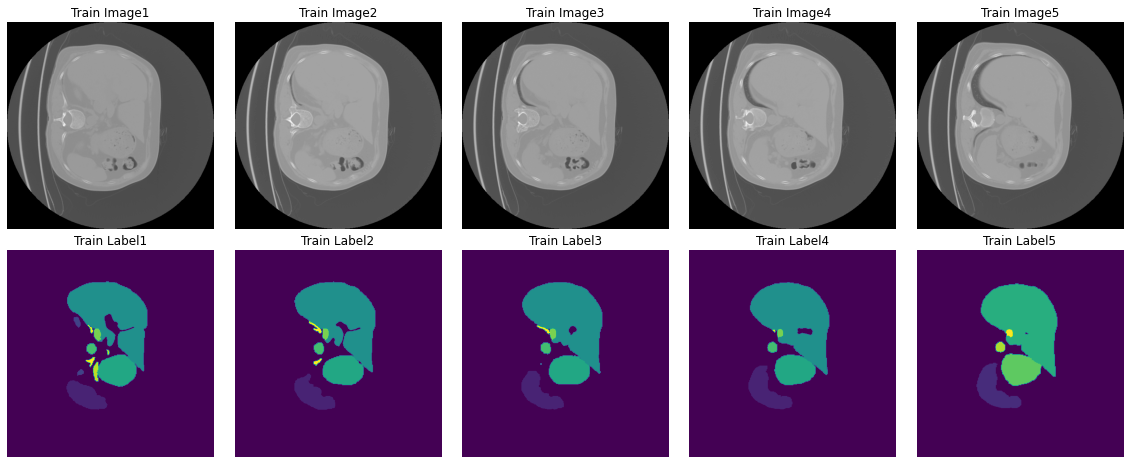

In [38]:
#visualizing some of the training images and labels
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted
print(os.getcwd())
os.chdir('/media/volume/sdb/experiment/')
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,200)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,70:75]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,70:75]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

(512, 512, 5)


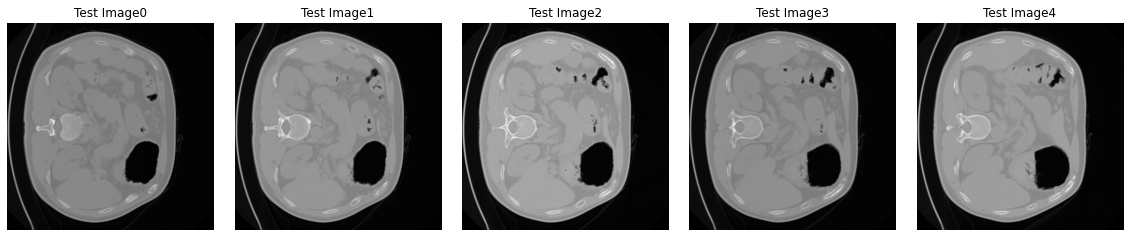

In [39]:
test_img_name = os.listdir(test_dir)[np.random.randint(0,100)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,70:75]

print(test_img.shape)

max_cols = test_img.shape[2]
max_rows = 1

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,20))
for idx in range(max_cols):
    axes[ idx].axis("off") 
    axes[ idx].set_title('Test Image'+str(idx))
    axes[ idx].imshow(test_img[:,:,idx], cmap="gray")
    
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

In [41]:
import torch
torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([2, 32, 64, 192, 160], dtype=torch.half, device='cuda', requires_grad=True)
net = torch.nn.Conv3d(32, 32, kernel_size=[1, 3, 3], padding=[0, 1, 1], stride=[1, 1, 1], dilation=[1, 1, 1], groups=1)
net = net.cuda().half()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

In [10]:
os.chdir('/media/volume/sdb/experiment/nnUNet/nnunet')
# !pip uninstall numpy -y
# !pip install numpy
!nnUNet_train 3d_fullres nnUNetTrainerV2 500 3 -c --npz



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 3d_fullres
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  13
modalities:  {0: 'CT'}
use_mask_for_norm OrderedDict([(0, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'CT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [4, 5, 5], 'patch_size': array([ 80, 160, 160]), 'median_patient_size_in_voxels': array([141, 240, 240]), 'current_sp

2022-12-02 14:36:44.963052: saving checkpoint...
2022-12-02 14:36:45.429378: done, saving took 0.53 seconds
amos_0001 (2, 225, 636, 636)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 225, 636, 636)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 54, 80, 107, 134, 161], [0, 89, 178, 266, 355, 444], [0, 79, 159, 238, 317, 397, 476]]
number of tiles: 294
computing Gaussian
done
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
amos_0009 (2, 225, 582, 582)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 225, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 54, 80, 107, 134, 161], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 294
using precomputed Gaussian
separate z, order in z is 0 order inplane is 1
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
separa

separate z, order in z is 0 order inplane is 1
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
amos_0129 (2, 310, 582, 582)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 310, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 92, 123, 154, 184, 215, 246], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 378
using precomputed Gaussian
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
amos_0135 (2, 328, 735, 735)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 328, 735, 735)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 59, 88, 117, 147, 176, 205, 235, 264], [0, 90, 181, 272, 362, 452, 543], [0, 72, 144, 216, 288, 359, 431, 503, 575]]
number of tiles: 630
usin

separate z, order in z is 0 order inplane is 1
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
amos_0378 (2, 240, 706, 706)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 240, 706, 706)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 59, 88, 117, 147, 176], [0, 86, 171, 257, 343, 428, 514], [0, 78, 156, 234, 312, 390, 468, 546]]
number of tiles: 392
using precomputed Gaussian
prediction done
force_separate_z: None interpolation order: 1
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
amos_0380 (2, 232, 677, 677)
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 232, 677, 677)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140, 168], [0, 81, 162, 242, 323, 404, 485], [0, 74, 148, 222, 295, 369, 443, 517]]
number of tiles: 392
using precomputed Gaussi

In [12]:
!nnUNet_find_best_configuration -t 500 -m 3d_fullres



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet


I will now ensemble combinations of the following models:
 ['3d_fullres']
3d_fullres 0.8907765144330246
Task500_AMOS submit model 3d_fullres 0.8907765144330246

Here is how you should predict test cases. Run in sequential order and replace all input and output folder names with your personalized ones

nnUNet_predict -i FOLDER_WITH_TEST_CASES -o OUTPUT_FOLDER_MODEL1 -tr nnUNetTrainerV2 -ctr nnUNetTrainerV2CascadeFullRes -m 3d_fullres -p nnUNetPlansv2.1 -t Task500_AMOS



In [ ]:
!nnUNet_predict -i /media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTs -o /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS -tr nnUNetTrainerV2 -ctr nnUNetTrainerV2CascadeFullRes -m 3d_fullres -p nnUNetPlansv2.1 -t Task500_AMOS



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_trained_models/nnUNet/3d_fullres/Task500_AMOS/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 100 unique case ids, here are some examples: ['amos_0233' 'amos_0189' 'amos_0290' 'amos_0208' 'amos_0228' 'amos_0365'
 'amos_0364' 'amos_0313' 'amos_0051' 'amos_0290']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 100
number of cases that still need to be predicted: 100
emptying cuda cache
loading parameters for folds, None
folds is None so we will a

(1, 205, 582, 582)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 205, 581, 581)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 85, 113, 141], [0, 78, 156, 233, 311, 389], [0, 70, 140, 210, 281, 351, 421]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 205, 581, 581)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 85, 113, 141], [0, 78, 156, 233, 311, 389], [0, 70, 140, 210, 281, 351, 421]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 205, 581, 581)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 85, 113, 141], [0, 78, 156, 233, 311, 389], [0, 70, 140, 210, 281, 351, 421]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 260, 651, 651)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140, 168, 196], [0, 92, 184, 275, 367, 459], [0, 70, 140, 210, 281, 351, 421, 491]]
number of tiles: 384
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 260, 651, 651)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140, 168, 196], [0, 92, 184, 275, 367, 459], [0, 70, 140, 210, 281, 351, 421, 491]]
number of tiles: 384
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0034.nii.gz
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0087.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0041.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 205, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 85, 113, 141], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 252
using precomputed Gaussian
separate z: True lowres axis [0]
before crop: (1, 87, 512, 512) after crop: (1, 87, 512, 512) spacing: [5.         0.78200001 0.78200001] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacin

separate z: True lowres axis [0]
before crop: (1, 112, 512, 512) after crop: (1, 112, 512, 512) spacing: [5.         0.78200001 0.78200001] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 112, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 280, 582, 582)} 

(1, 280, 582, 582)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 195, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 26, 52, 79, 105, 131], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mir

(1, 218, 582, 582)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 228, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 55, 82, 109, 137, 164], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 228, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 55, 82, 109, 137, 164], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 228, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 55, 82, 109, 137, 164], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirr

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 240, 771, 771)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 59, 88, 117, 147, 176], [0, 83, 165, 248, 331, 414, 496, 579], [0, 76, 153, 229, 306, 382, 458, 535, 611]]
number of tiles: 504
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 240, 771, 771)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 59, 88, 117, 147, 176], [0, 83, 165, 248, 331, 414, 496, 579], [0, 76, 153, 229, 306, 382, 458, 535, 611]]
number of tiles: 504
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0132.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/s

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0140.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0120.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 218, 582, 582)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 92, 123, 154], [0, 78, 156, 234, 312, 390], [0, 70, 141, 211, 281, 352, 422]]
number of tiles: 252
using precomputed Gaussian
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 103, 768, 768) after crop: (1, 103, 768, 768) spacing: [5.         0.59895831 0.59895831] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spac

separate z: True lowres axis [0]
before crop: (1, 96, 512, 512) after crop: (1, 96, 512, 512) spacing: [5.         0.78200001 0.78200001] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.78200001, 0.78200001]), 'spacing_transposed': array([5.        , 0.78200001, 0.78200001]), 'data.shape (data is transposed)': (1, 96, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 240, 582, 582)} 

(1, 240, 582, 582)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 262, 721, 721)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 57, 85, 113, 141, 170, 198], [0, 88, 176, 264, 353, 441, 529], [0, 70, 140, 210, 280, 351, 421, 491, 561]]
number of tiles: 504
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)

separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.98000002, 0.98000002]), 'spacing_transposed': array([5.        , 0.98000002, 0.98000002]), 'data.shape (data is transposed)': (1, 132, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 330, 729, 729)} 

(1, 330, 729, 729)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 338, 629, 629)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152, 183, 213, 244, 274], [0, 87, 175, 262, 350, 437], [0, 78, 156, 234, 313, 391, 469]]
number of tiles: 420
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 338, 629, 629)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152, 183, 213, 244, 274], [0, 87, 175, 262, 350, 437], [0, 78, 156, 234, 313, 391, 469]]
number of tiles: 

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 248, 588, 588)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 153, 184], [0, 79, 158, 238, 317, 396], [0, 71, 143, 214, 285, 357, 428]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 248, 588, 588)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 153, 184], [0, 79, 158, 238, 317, 396], [0, 71, 143, 214, 285, 357, 428]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 248, 588, 588)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 153, 184], [0, 79, 158, 238, 317, 396], [0, 71, 143, 214, 285, 357, 428]]
number of tiles: 294
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
s

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 308, 559, 559)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 92, 122, 152, 183, 214, 244], [0, 92, 184, 275, 367], [0, 80, 160, 239, 319, 399]]
number of tiles: 270
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 308, 559, 559)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 92, 122, 152, 183, 214, 244], [0, 92, 184, 275, 367], [0, 80, 160, 239, 319, 399]]
number of tiles: 270
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0204.nii.gz
using preprocessor GenericPreprocessor
separate z: True lowres axis [0]
predicting /media/volume/sdb/expe

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0208.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0194.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 185, 596, 596)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 60, 91, 121], [0, 81, 162, 242, 323, 404], [0, 73, 145, 218, 291, 363, 436]]
number of tiles: 210
using precomputed Gaussian
separate z: True lowres axis [0]
before crop: (1, 206, 512, 512) after crop: (1, 206, 512, 512) spacing: [2.       0.640625 0.640625] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
separate z, order in z is 0 order inplane is 1
before: {'spacing': array

separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 202, 512, 512) after crop: (1, 202, 512, 512) spacing: [2.         0.63867188 0.63867188] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.        , 0.63867188, 0.63867188]), 'spacing_transposed': array([2.        , 0.63867188, 0.63867188]), 'data.shape (data is transposed)': (1, 202, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 202, 475, 475)} 

(1, 202, 475, 475)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 220, 572, 572)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 94, 125, 156], [0, 95, 190, 285, 380], [0, 69, 137, 206, 275, 343, 412]]
number of tiles: 210
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: 

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 216, 590, 590)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152], [0, 80, 159, 239, 318, 398], [0, 72, 143, 215, 287, 358, 430]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 216, 590, 590)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152], [0, 80, 159, 239, 318, 398], [0, 72, 143, 215, 287, 358, 430]]
number of tiles: 252
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 216, 590, 590)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152], [0, 80, 159, 239, 318, 398], [0, 72, 143, 215, 287, 358, 430]]
number of tiles: 252
using precomputed Gaussian
prediction done
This output is too large for python process-process communic

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0223.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0219.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 202, 475, 475)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 55, 83, 110, 138], [0, 94, 189, 283], [0, 79, 158, 236, 315]]
number of tiles: 120
using precomputed Gaussian
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 206, 512, 512) after crop: (1, 206, 512, 512) spacing: [2.         0.65039062 0.65039062] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([2.     

separate z: False lowres axis None
no separate z, order 1
before crop: (1, 232, 512, 512) after crop: (1, 232, 512, 512) spacing: [2.         0.69335938 0.69335938] 

no separate z, order 3
no separate z, order 1
before: {'spacing': array([2.        , 0.69335938, 0.69335938]), 'spacing_transposed': array([2.        , 0.69335938, 0.69335938]), 'data.shape (data is transposed)': (1, 232, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 232, 516, 516)} 

(1, 232, 516, 516)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 307, 525, 525)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 61, 91, 122, 152, 182, 213, 243], [0, 83, 166, 250, 333], [0, 73, 146, 219, 292, 365]]
number of tiles: 270
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 307, 525, 525)
patch size: [ 64 192 160

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 314, 482, 482)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 94, 125, 156, 188, 219, 250], [0, 72, 145, 218, 290], [0, 64, 129, 193, 258, 322]]
number of tiles: 270
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 314, 482, 482)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 94, 125, 156, 188, 219, 250], [0, 72, 145, 218, 290], [0, 64, 129, 193, 258, 322]]
number of tiles: 270
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 314, 482, 482)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 94, 125, 156, 188, 219, 250], [0, 72, 145, 218, 290], [0, 64, 129, 193, 258, 322]]
number of tiles: 270
using precomputed Gaussian
prediction done
This output is too large for python process-p

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0287.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0278.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 232, 516, 516)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140, 168], [0, 81, 162, 243, 324], [0, 71, 142, 214, 285, 356]]
number of tiles: 210
using precomputed Gaussian
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 353, 512, 512) after crop: (1, 353, 512, 512) spacing: [1.25       0.97656202 0.97656202] 

no separate z, order 3
no separate z, order 1
before: {'spacing': array([1.25      , 0.97656202, 0.97656202]), 's

no separate z, order 3
no separate z, order 1
before: {'spacing': array([2.        , 0.66796875, 0.66796875]), 'spacing_transposed': array([2.        , 0.66796875, 0.66796875]), 'data.shape (data is transposed)': (1, 252, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 252, 497, 497)} 

(1, 252, 497, 497)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 284, 452, 452)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 63, 94, 126, 157, 189, 220], [0, 87, 173, 260], [0, 73, 146, 219, 292]]
number of tiles: 160
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 284, 452, 452)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 63, 94, 126, 157, 189, 220], [0, 87, 173, 260], [0, 73, 146, 219, 292]]
number of tiles: 160
using precomputed Gaussian
prediction done
debug: mirrori

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 219, 516, 516)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 93, 124, 155], [0, 81, 162, 243, 324], [0, 71, 142, 214, 285, 356]]
number of tiles: 180
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 219, 516, 516)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 62, 93, 124, 155], [0, 81, 162, 243, 324], [0, 71, 142, 214, 285, 356]]
number of tiles: 180
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0310.nii.gz
using preprocessor GenericPreprocessor
separate z: False lowres axis None
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_

predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0293.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 252, 497, 497)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 63, 94, 125, 157, 188], [0, 76, 152, 229, 305], [0, 67, 135, 202, 270, 337]]
number of tiles: 210
using precomputed Gaussian
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 225, 512, 512) after crop: (1, 225, 512, 512) spacing: [2.         0.74414062 0.74414062] 

no separate z, order 3
no separate z, order 1
before: {'spacing': array([2.        , 0.74414062, 0.74414062]), 'spacing_transposed': array([2.        , 0.74414062, 0.74414062]), 'data.shape (data is transposed)': (1, 225, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 225, 554, 554)} 

(1, 225, 554, 554)
prediction done
debug: mirroring True mirror_ax

(1, 207, 574, 574)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 210, 468, 468)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 58, 88, 117, 146], [0, 92, 184, 276], [0, 77, 154, 231, 308]]
number of tiles: 120
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 210, 468, 468)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 58, 88, 117, 146], [0, 92, 184, 276], [0, 77, 154, 231, 308]]
number of tiles: 120
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 210, 468, 468)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 58, 88, 117, 146], [0, 92, 184, 276], [0, 77, 154, 231, 308]]
number of tiles: 120
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 210, 468, 

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 230, 539, 539)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 55, 83, 111, 138, 166], [0, 87, 174, 260, 347], [0, 76, 152, 227, 303, 379]]
number of tiles: 210
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0339.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0316.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 225, 554, 554)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 27, 54, 80, 107, 134, 161], [0, 90, 181, 272, 362], [0, 79, 158, 236, 315, 394]]
number of tiles: 210
using precomputed Gaussian

separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 116, 512, 512) after crop: (1, 116, 512, 512) spacing: [5.        0.5859375 0.5859375] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.       , 0.5859375, 0.5859375]), 'spacing_transposed': array([5.       , 0.5859375, 0.5859375]), 'data.shape (data is transposed)': (1, 116, 512, 512)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 290, 436, 436)} 

(1, 290, 436, 436)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 207, 574, 574)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 29, 57, 86, 114, 143], [0, 96, 191, 286, 382], [0, 69, 138, 207, 276, 345, 414]]
number of tiles: 210
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 204, 520, 520)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140], [0, 82, 164, 246, 328], [0, 72, 144, 216, 288, 360]]
number of tiles: 180
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 204, 520, 520)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140], [0, 82, 164, 246, 328], [0, 72, 144, 216, 288, 360]]
number of tiles: 180
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 204, 520, 520)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 84, 112, 140], [0, 82, 164, 246, 328], [0, 72, 144, 216, 288, 360]]
number of tiles: 180
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporari

prediction done
This output is too large for python process-process communication. Saving output temporarily to disk
force_separate_z: None interpolation order: 1
preprocessing /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0365.nii.gz
using preprocessor GenericPreprocessor
predicting /media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/amos_0326.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 290, 436, 436)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 28, 56, 85, 113, 141, 170, 198, 226], [0, 81, 163, 244], [0, 69, 138, 207, 276]]
number of tiles: 180
using precomputed Gaussian
separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
before crop: (1, 96, 768, 768) after crop: (1, 96, 768, 768) spacing: [5.        0.6015625 0.6015625] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': arra

before crop: (1, 97, 768, 768) after crop: (1, 97, 768, 768) spacing: [5.         0.58072919 0.58072919] 

separate z, order in z is 0 order inplane is 3
separate z, order in z is 0 order inplane is 1
before: {'spacing': array([5.        , 0.58072919, 0.58072919]), 'spacing_transposed': array([5.        , 0.58072919, 0.58072919]), 'data.shape (data is transposed)': (1, 97, 768, 768)} 
after:  {'spacing': array([2.        , 0.68825001, 0.68825001]), 'data.shape (data is resampled)': (1, 242, 648, 648)} 

(1, 242, 648, 648)
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 306, 461, 461)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 60, 91, 121, 151, 182, 212, 242], [0, 90, 179, 269], [0, 75, 150, 226, 301]]
number of tiles: 180
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 306, 461, 461)
patch size: [ 64 192 160]
steps (x, y, and z): 

prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 279, 436, 436)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 154, 184, 215], [0, 81, 163, 244], [0, 69, 138, 207, 276]]
number of tiles: 160
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 279, 436, 436)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 154, 184, 215], [0, 81, 163, 244], [0, 69, 138, 207, 276]]
number of tiles: 160
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 279, 436, 436)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 31, 61, 92, 123, 154, 184, 215], [0, 81, 163, 244], [0, 69, 138, 207, 276]]
number of tiles: 160
using precomputed Gaussian
prediction done
This output is too large for python process-process communication. Saving output temporari

separate z: True lowres axis [0]
separate z, order in z is 0 order inplane is 1
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 242, 648, 648)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 59, 89, 119, 148, 178], [0, 91, 182, 274, 365, 456], [0, 70, 139, 209, 279, 349, 418, 488]]
number of tiles: 336
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 242, 648, 648)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 59, 89, 119, 148, 178], [0, 91, 182, 274, 365, 456], [0, 70, 139, 209, 279, 349, 418, 488]]
number of tiles: 336
using precomputed Gaussian
prediction done
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (1, 242, 648, 648)
patch size: [ 64 192 160]
steps (x, y, and z): [[0, 30, 59, 89, 119, 148, 178], [0, 91, 182, 274, 365, 456], [0, 70, 139, 209, 279, 349, 418, 488]]
number of tile

Test Image Shape:  (512, 512, 5)
Predicted Image Shape: (512, 512, 5)


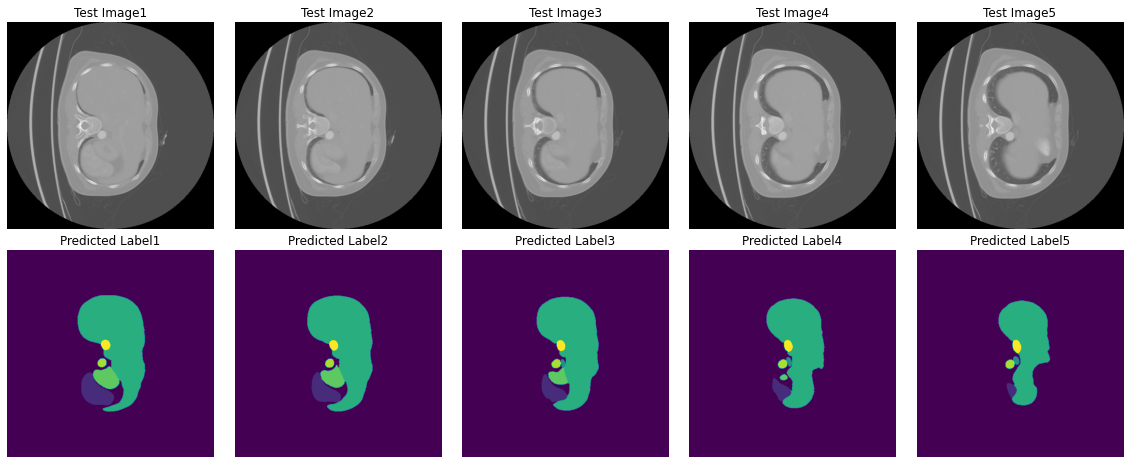

In [8]:
#visualizing the predicted results
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted
test_dir = '/media/volume/sdb/experiment/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task500_AMOS/imagesTs'
result_dir = '/media/volume/sdb/experiment/nnUNet/nnunet/nnUnet_predictions/Task500_AMOS/'
# label_dir = 
test_img_name = os.listdir(test_dir)[np.random.randint(0,100)]
test_img = np.array(nib.load(os.path.join(test_dir,test_img_name)).dataobj)[:,:,80:85]
predicted_img_name = test_img_name[:test_img_name.find('_0000.nii.gz')]+'.nii.gz'
predicted_label = np.array(nib.load(os.path.join(result_dir,predicted_img_name)).dataobj)[:,:,80:85]

print('Test Image Shape: ',test_img.shape)
print("Predicted Image Shape:",predicted_label.shape)


max_rows = 2
max_cols = test_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off") 
    axes[0, idx].set_title('Test Image'+str(idx+1))
    axes[0 ,idx].imshow(test_img[:,:,idx], cmap="gray")
for idx in range(max_cols):    
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Predicted Label'+str(idx+1))
    axes[1, idx].imshow(predicted_label[:,:,idx])
    
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()